<a href="https://colab.research.google.com/github/shahar-lazarev/ML_assignments/blob/main/Assignment_2_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
iris = sklearn.datasets.load_iris()
X = iris["data"][:, 2:]
y = (iris["target"] == 0).astype(np.int)

# print(X)
# y[:]

In [3]:
sigmoid = lambda x: 1/(1+np.exp(-x))

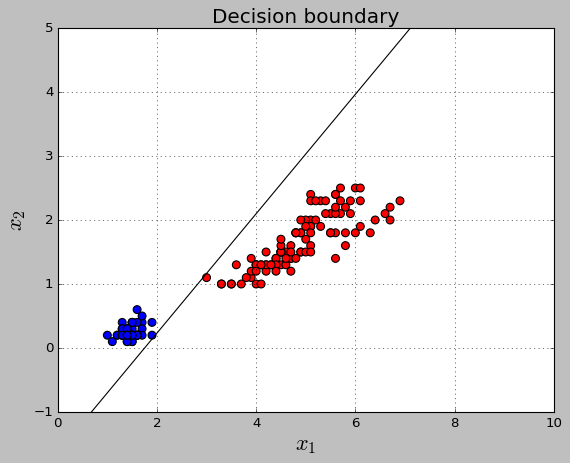

In [25]:
import tensorflow.compat.v1 as tf1

LEARNING_RATE = 30.0
NUM_EPOCHS = 10

def get_loss(y, a):
  return -1 * (y * np.log(a) +
               (1-y) * np.log(1-a))

def get_loss_numerically_stable(y, z):
   return -1 * (y * -1 * np.log(1 + np.exp(-z)) +
                (1-y) * (-z - np.log(1 + np.exp(-z))))
   
def plot_scatter(X, y, colormap, path):
  plt.grid()
  plt.xlim([0.0, 10.0])
  plt.ylim([-1.0, 5.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Input 2D points', size=18)
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[y])
  plt.savefig(path)

def plot_decision_boundary(X, y, w, b, path):
   plt.grid()
   plt.xlim([0.0, 10.0])
   plt.ylim([-1.0, 5.0])
   plt.xlabel('$x_1$', size=20)
   plt.ylabel('$x_2$', size=20)
   plt.title('Decision boundary', size = 18)

   xs = np.array([-20.0, 20.0])
   ys = (-w[0] * xs - b)/w[1]

   plt.scatter(X[:,0], X[:,1], s=50, c=colormap[y])
   
   plt.plot(xs, ys, c='black')
   plt.savefig(path)

w_cache = []
b_cache = []
l_cache = []

colormap = np.array(['r', 'b'])
# colormap = np.array(['set', 'vers', 'vir'])

# some nice initial value, so that the plot looks nice.
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

t_X = tf1.placeholder(tf.float32, [None, 2])
t_Y = tf1.placeholder(tf.float32, [None, 1])

t_W = tf.Variable([[-4.0], [29.0]])
t_b = tf.Variable(tf.zeros([1]))

t_Z = tf.matmul(t_X, t_W) + t_b
t_Yhat = tf.sigmoid(t_Z)
t_Loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = t_Z,  labels = t_Y))

train = tf1.train.GradientDescentOptimizer(8.0).minimize(t_Loss)
init = tf1.global_variables_initializer()

with tf1.Session() as session:
   session.run(init)
   trainings = []
   losses = []
   for i in range(200):
      ttrain, ttloss = session.run([train, t_Loss], feed_dict={t_X:X, t_Y:y.reshape(150, 1)})
      losses.append(ttloss)
      trainings.append(ttrain)
  
   output = t_W[:, :]
   final_W = session.run(output)
   output = t_b[:]
   final_B = session.run(output)


plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

plot_decision_boundary(X, y, final_W, final_B, 'image.png')
# plt.savefig('image.png')

# plt.close()
# plt.clf()
# plt.cla()